In [ ]:
import csv
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyreadr import pyreadr
from matplotlib import pyplot

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

In [ ]:
result = pyreadr.read_r('osfstorage-archive/RDS/eda.rds') # also works for RData
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = result[None] # extract the pandas data frame
df2=df[df['subject']=='02']
df2

In [ ]:
df['subject'].unique()

In [ ]:
df['CR'].max()

In [ ]:
df['CR'].min()

CR potrebbe essere la skin response from 0.03 to 9.84

ln_cr è la CR scaled with a log to reduce the skew of the amplitude distribution

threat -> da 1 a 6
probably
1 cs-
2 gs1
3 gs2
4 gs3
5 gs4
6 cs+

try to use this cr colomn in this rds, what is the sampling rate? un dato ogni 8 secondi


    sampling rate = num lines/durata esperimento

In [ ]:
num_lines= len(df['CR'])
print(num_lines)

In [ ]:
start_exp=df['time.start'].min()
print(start_exp)

In [ ]:
end_exp=df['time.end'].max()
print(end_exp)

In [ ]:
sampl_r=(end_exp-start_exp)/num_lines
sampl_r

se ipotizzo sampling rate di 500hz e lo moltiplico per la lunghezza del sample dovrei ottenere il tempo totale  ma 10 sec è un tempo ridicolo quindi sampling rate <<500hz

In [ ]:
0.002*num_lines

In [ ]:
rows['CDA.Tonic'].plot()

# analisi file eda uno per uno

## riassumendo

eda 4 file dati

a) file 01.txt solo CH1
1 file per ogni partecipante con sampling rate noto (500HZ)
più di 1.4 M rows
quindi il segnale totale dura circa 284992 secondi
segnale che contiene sum di phasic e tonic
il vantaggio di questo tipo di file è che siamo già sincronizzati con heart (a meno di latenze)

colonne
CH1 --> eda
CH2 --> heartrate
CH28 --> trigger

b)01_era.txt
1 file per ogni partecipante senza sampling rate
188 righe
durata segnale boh
contiene phasic e tonic già divisa
forse dati costruiti using Continuous Decomposition Analysis dai file 01.txt avrebbe senso con una certa media (che in teoria serve a dividere thonic da phasic)

'Event.Nr' --> int da 0 a 188
'CDA.nSCR' --> int da 0 a 4
'CDA.Latency' --> flot from 0.5 to 3.0
'CDA.AmpSum' --> float from 0 to 1.3
'CDA.SCR' --> float from 0 to 0.1 forse valori di skin conductance response (phasic values)
'CDA.ISCR' --> flot from 0 to 5.5 forse valori di integrated skin conductance response ( uguale a 'CDA.SCR'*45 )
'CDA.PhasicMax' --> float from 0 to 6.1 (molto simile a ISCR)
'CDA.Tonic' --> float from 9.9 to 10.9 forse valori della parte tonic
'TTP.nSCR' --> int from 0 to 2 pare nessuna relazione con CDA.nSCR
'TTP.Latency' --> float from 0.5 to 2.8 non capisco se correlata o meno a CDA latency
'TTP.AmpSum' --> float from 0 to 1.3 sembra correlato con CDA.ampsum
'Global.Mean' --> float from 9.9 to 11.7 mean ma di cosa?
'Global.MaxDeflection' --> float from 0 to 1 deflection de che? dalla media?
'Event.NID' --> solo 1 o 2 direi useless
'Event.Name' --> solo "1" o "2" direi useless



c)eda.ucr.rds
1 file per tutti
contiene 1 solo value per ogni paziente 'ucr'

'subject' --> boolean
'ucr' --> unconditioned? conductance response
'valid' --> float from 0 to 1
'include' --> boolean sembra correlato con valid (sembra una sua approssimazione)
'ln_ucr' -->  unconditioned? conductance response con una trasformazione logaritmica

come se ucr fosse una baseline per ogni paziente?


d)eda.rds
1 file unico con 1 dato ogni trial
info su trial, threat, paziente
'trial' --> informazione sul trial (da 1 a 160)
'condition' --> data dall'unione di pair e threat (pair+threat)
'threat' --> da 1 a 6 (1:cs- 2:gs1 3:gs2 4:gs3 5:gs4 6:cs+)
'pair' --> da 1 a 4
'shock' --> boolean
'shockPrior' --> boolean
'time.start' --> time.end-8
'time.end' -->
'sample.start' --> differisce di un fattore moltiplicato k circa 500 da time.start
'sample.end' --> differisce di un fattore moltiplicato k circa 500 da time.end
'CR' --> conductance response
'subject' --> paziente
'diagnostic' --> region of interest
'pairs' --> 1 o 2 legato a pair?
'ln_cr' --> conductance response con una trasformazione logaritmica


## a) file 01.txt

In [ ]:
# 01.txt
df_txt = pd.read_csv("tmp_eda01.csv")
df_txt = df_txt['CH1']
df_txt

decompose into tonic e phasic

## b)01_era.txt

In [ ]:
#era.txt
with open('osfstorage-archive/physio/ledalab/01_era.txt') as f:
    lines = f.readlines()
lines = list(lines)
lines = [line.replace('\n', "") for line in lines]
lines[:10]
columns = lines[0].split('\t')
rows = [row.split("\t") for row in lines[1:]]

with open('csv_tmp', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(columns)
    write.writerows(rows)

# creating csv
df_era = pd.read_csv("csv_tmp")
df_era

In [ ]:
diff = np.subtract(df_era['CDA.Latency'].astype(float),df_era['TTP.Latency'].astype(float))
diff

In [ ]:
pyplot.plot(df_era['CDA.AmpSum'])
pyplot.plot(df_era['TTP.AmpSum'])

In [ ]:
pyplot.plot(df_era['CDA.ISCR'])
pyplot.plot(df_era['CDA.SCR']*45)

In [ ]:
pyplot.plot(df_era['CDA.ISCR'])
pyplot.plot(df_era['CDA.PhasicMax'])

In [ ]:
#analyze diff between latency

cda_lat=np.array(df_era['CDA.Latency']).astype(float)
ttp_lat=np.array(df_era['TTP.Latency']).astype(float)
res = np.subtract(cda_lat,ttp_lat)
res = res[~np.isnan(res)]

pyplot.plot(res)

## c)eda.ucr.rds

In [ ]:
result = pyreadr.read_r('osfstorage-archive/RDS/eda.ucr.rds')
df = result[None]
df

In [ ]:
pyplot.plot(np.log10(df['ucr'])+1)
pyplot.plot(df['ln_ucr'])

In [ ]:
pyplot.plot(df['valid'])
pyplot.plot(df['include'])

## d)eda.rds

In [ ]:
result = pyreadr.read_r('osfstorage-archive/RDS/eda.rds')
df = result[None]
df

In [ ]:
(df['sample.end']-df['sample.start']).unique()

In [ ]:
(df['time.end']-df['time.start']).unique()

In [ ]:
df_=df
df_['pair'] = df_['pair'].apply(np.int64).astype(str)
df_['threat'] = df_['threat'].apply(np.int64).astype(str)
df_['pair_threat'] = df_['pair']+df_['threat']
df_['pair_threat'] = df_['pair_threat'].astype(float)
np.subtract(df_['condition'],df_['pair_threat']).unique()

la colonna condition è data esattamente dall'unione di pair e threat

In [ ]:
shock_=[1 if x=='True' else 0 for x in df['shock']]
shockprior_=[1 if x=='True' else 0 for x in df['shockPrior']]
x_ = (np.subtract(shock_,shockprior_))
y_ = [x for x in range(0,len(x))]
pyplot.plot(y_,x_,linewidth=0.4)
pyplot.xlim(0,200)

In [ ]:
print('count -1: '+str(list(x_).count(-1)))
print('count 1: '+str(list(x_).count(1)))
print('count 0: '+str(list(x_).count(0)))

Essendoci la maggioranza di valori a 0 la maggior parte di valori di shock pror e shock coincidono

In [ ]:
pyplot.plot(df['time.start']*400)
pyplot.plot(df['sample.start'])

In [ ]:
pyplot.plot(df['time.end']*400)
pyplot.plot(df['sample.end'])

In [ ]:
print(df['condition'].sort_values().unique())

# paragone 01.txt e 01_era.txt

read 01_era.txt

In [ ]:
with open('osfstorage-archive/physio/ledalab/01_era.txt') as f:
    lines = f.readlines()
lines = list(lines)
lines = [line.replace('\n', "") for line in lines]
lines[:10]
columns = lines[0].split('\t')
rows = [row.split("\t") for row in lines[1:]]

with open('csv_tmp', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(columns)
    write.writerows(rows)

# creating csv
rows_era = pd.read_csv("csv_tmp")
rows_era

read 01.txt

In [ ]:
for i in range(1,56):
    path = r"./osfstorage-archive/physio/"
    ext=".txt"
    new_name="tmp_eda"

    if i<10:
        path = path+"0"
        new_name =new_name+"0"

    filename=path+str(i)+ext
    new_name=new_name+str(i)+".csv"

    try:
        with open(filename, 'r') as fp:
            lines = (fp.readlines())
    except FileNotFoundError as e:
        continue

    if("EDA" not in lines[3]):
        print("error not eda file")
        break

    lines_eda_good = lines[11:]
    lines_eda_good = [line.replace("\t", " ") for line in lines_eda_good]
    lines_eda_good = [line.replace("\n", "") for line in lines_eda_good]

    fields = ["CH1","CH2","CH28"]
    rows = [ row.split(" ") for row in lines_eda_good ]
    rows = [row[:3] for row in rows]
    with open(new_name, 'w') as f:

        # using csv.writer method from CSV package
        write = csv.writer(f)

        write.writerow(fields)
        write.writerows(rows)


In [ ]:
data_real = pd.read_csv("tmp_eda01.csv")
len(data_real)


In [ ]:
eda_real = data_real['CH1']
eda_real

In [ ]:
signals_txt, info_txt = nk.eda_process(eda_real, sampling_rate=500,method="neurokit")
# Visualise the processing
nk.eda_plot(signals_txt, sampling_rate=500)

plt.show()

In [ ]:
signals_txt
signals_txt_ = signals_txt.reset_index(drop=False)
signals_txt_ = signals_txt[['EDA_Phasic','EDA_Tonic']]
signals_txt_[:8650].mean()

In [ ]:
list_txt_ph = signals_txt_['EDA_Phasic']
list_txt_to = signals_txt_['EDA_Tonic']

In [ ]:
rows_era_ = rows_era.reset_index(drop=False)
rows_era_ = rows_era[['CDA.SCR','CDA.Tonic']]
rows_era_

In [ ]:
list_era_ph = rows_era_['CDA.SCR']
list_era_to = rows_era_['CDA.Tonic']

In [ ]:
min_ = min(len(list_txt_ph),len(list_era_ph))
min_

In [ ]:
range_=len(list_txt_ph)-len(list_era_ph)
range_

vediamo se c'è qualche tipo di correlazione tra queste due cose

In [ ]:
max_rho = float(-1)
min_rho = float(1)
index_max = 0
index_min = 0
for i in range(range_):
    x_simple = np.array(list_era_ph)[:min_]
    y_simple = np.array(list_txt_ph)[i:min_+i]
    my_rho = float(np.corrcoef(x_simple, y_simple)[0][1])

    if my_rho > max_rho:
        max_rho = my_rho
        index_max = i

    if my_rho < min_rho:
        min_rho = my_rho
        index_min = i
print("max ",max_rho,index_max)
print("min ",min_rho,index_min)

non sembra esserci correlazione apparente, ma magari i secondi sono un qualche tipo di media? come lo verifico?

In [ ]:
max_rho = float(-1)
min_rho = float(1)
index_max = 0
index_min = 0
for i in range(range_):
    x_simple = np.array(list_era_to)[:min_]
    y_simple = np.array(list_txt_to)[i:min_+i]
    my_rho = float(np.corrcoef(x_simple, y_simple)[0][1])

    if my_rho > max_rho:
        max_rho = my_rho
        index_max = i

    if my_rho < min_rho:
        min_rho = my_rho
        index_min = i
print("max ",max_rho,index_max)
print("min ",min_rho,index_min)

# sync pupil e file .txt ch1

In [1]:
import csv
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyreadr import pyreadr

In [55]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 16

remove patients non valid for eda

In [3]:
notvalid = [x for x in range(34,41)]
notvalid.append(9)

valid_patients_eda = [ele for ele in range(1,56) if ele not in notvalid]

remove patients non valid for pupil

In [4]:
notvalid = [x for x in range(34,41)]
notvalid.extend([9,20,25,42])

valid_patients_pupil = [ele for ele in range(1,56) if ele not in notvalid]

select patients with either pupil and eda data

In [5]:
valid_pupil_eda = list(set(valid_patients_eda).intersection(set(valid_patients_pupil)))

## test with first person

extract pupil data of the first patient

In [6]:
# person 1
pupil1 = pd.read_csv('../osfstorage-archive/eye/pupil/Look001_pupil.csv', sep=';')
for i in (pupil1.columns):
    if i != 'trial':
        for j in pupil1.index:
            pupil1.loc[j, i] = pupil1.loc[j, i].replace(',', '.')
cols = pupil1.columns.drop('trial')

pupil1[cols] = pupil1[cols].apply(pd.to_numeric, errors='coerce')

In [119]:
pupil1

pandas.core.frame.DataFrame

In [8]:
# convert all datas into one list
pat1_pupil = []
for i in range(160):
    colonne = pupil1.columns.drop(['trial'])
    for colonna in colonne:
        pat1_pupil.append(pupil1.loc[i][colonna])
pat1_pupil

[1.96285857246005,
 1.9624585182853,
 1.96208254593662,
 1.96174249724518,
 1.96145171554016,
 1.96122445230387,
 1.96107517867964,
 1.96101783605988,
 1.96106503721927,
 1.961227299219,
 1.96151244181316,
 1.96192524797592,
 1.96246722665371,
 1.96313639918554,
 1.96392732838597,
 1.96483141029487,
 1.96583717521354,
 1.9669303978296,
 1.96809399327224,
 1.96930784934637,
 1.97054869634696,
 1.97178998959547,
 1.97300180918046,
 1.97415083926245,
 1.97520052113634,
 1.97611137435132,
 1.97684137529976,
 1.97734633857016,
 1.97758024466739,
 1.97749548152223,
 1.97704304219909,
 1.9761728046846,
 1.97483409227958,
 1.97297652058376,
 1.9705510622495,
 1.96751133484899,
 1.96381494993575,
 1.95942480161691,
 1.95431047816026,
 1.94845009953754,
 1.94183273155655,
 1.93446124128041,
 1.92635534127469,
 1.91755466490185,
 1.90812190742402,
 1.89814644474412,
 1.88774883068114,
 1.87708578008522,
 1.86635490353104,
 1.85579885489827,
 1.8457086155317,
 1.83642603047722,
 1.82834539956799,


sampling rate of pupil data --> 100hz

Plot pupil

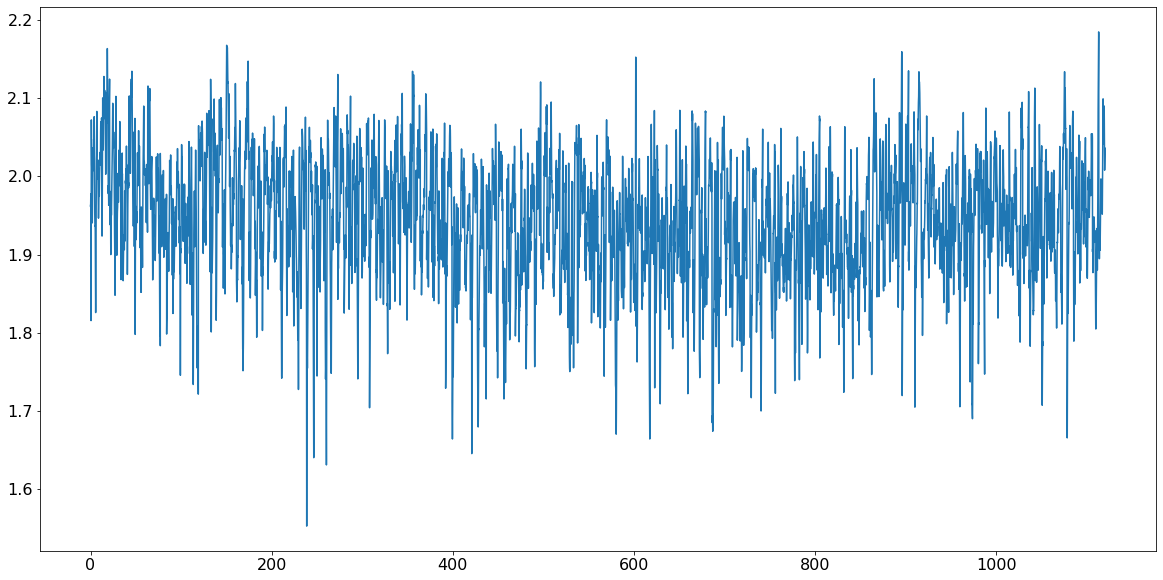

In [50]:
X = np.arange(0, 7*160, 0.01)
Y = list(pat1_pupil)
plt.plot(X, Y)
plt.show()

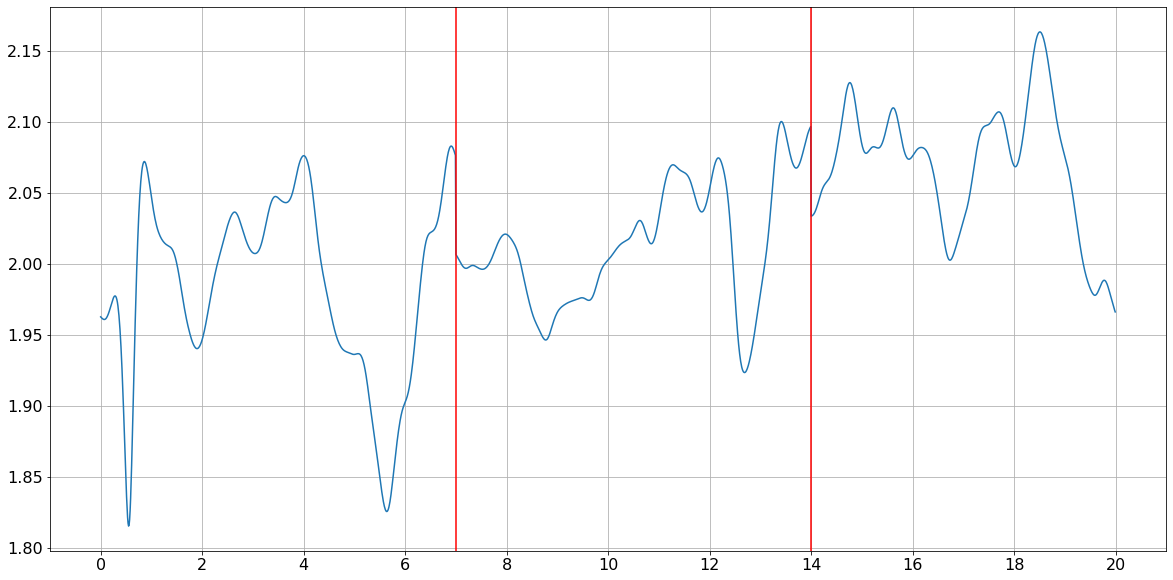

In [51]:
# first 20 seconds
X_20 = X[:20*100]
Y_20 = Y[:20*100]
plt.plot(X_20, Y_20)
plt.axvline(7, color='red')
plt.axvline(14, color='red')
plt.xticks(np.arange(0,21,2))
plt.grid()
plt.show()

extract eda data of patient 1

In [11]:
pat1_eda = pd.read_csv("../tmp_eda01.csv")['CH1']
pat1_eda.to_numpy()

array([ 7.96814e+00,  7.96814e+00,  7.96967e+00, ..., -3.05201e-03,
       -3.05201e-03, -3.05201e-03])

eda ha sampling rate di 500hz, pupil di 100hz.

In [12]:
print('len eda data '+str(len(pat1_eda)))
print('len pupil data '+str(len(pat1_pupil)))

len eda data 1421036
len pupil data 112000


In [13]:
(1421036/160)*0.002

17.76295

downsample eda data to 500hz to 100hz. I take only one sample every 5

In [14]:
pat1_eda_new = []

for x in range(len(pat1_eda)):
    if x%5==0:
        pat1_eda_new.append(pat1_eda[x])

eda con 100hz

In [15]:
len(pat1_eda_new)

284208

In [16]:
len(pat1_pupil)

112000

### divide eda into tonic e phasic

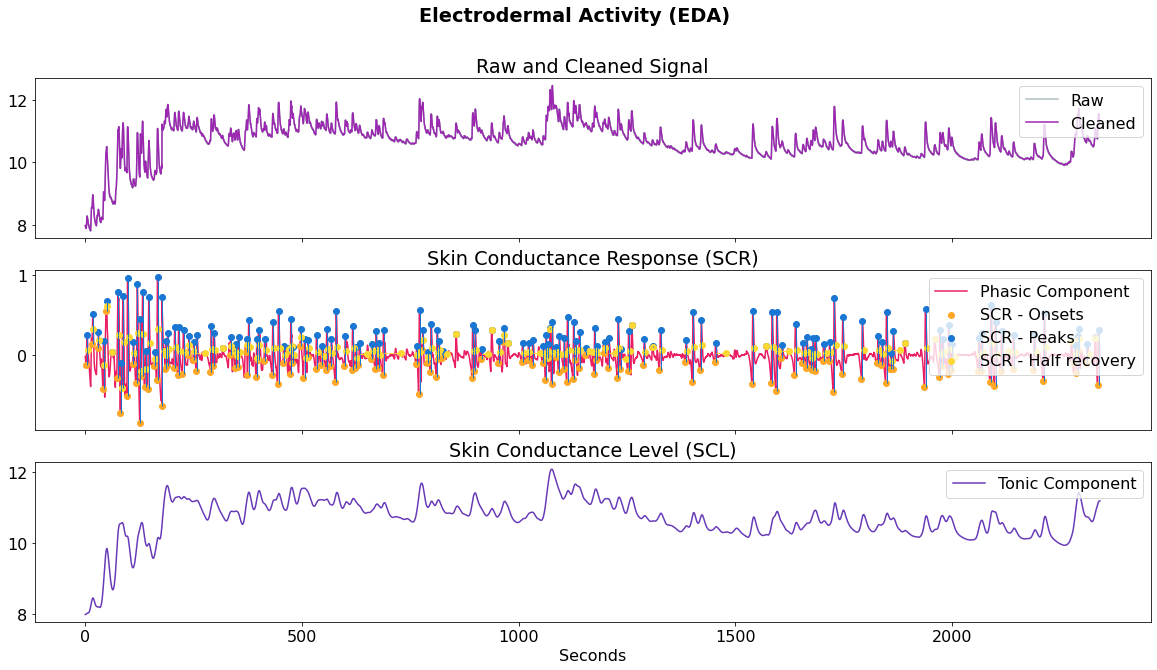

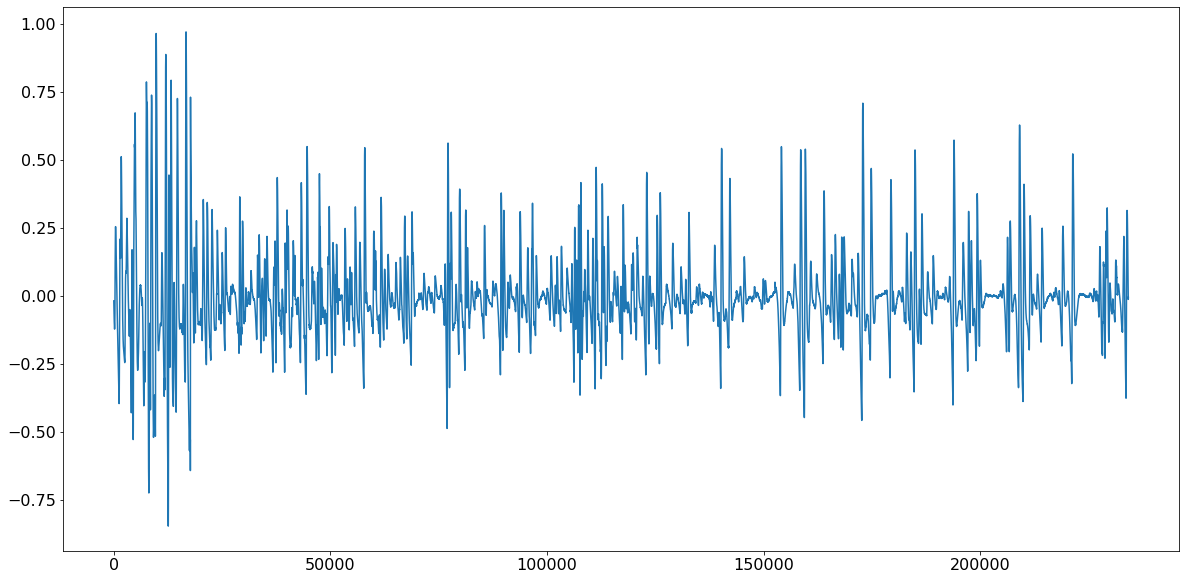

In [52]:
signals, info = nk.eda_process(pat1_eda_new, sampling_rate=100)
nk.eda_plot(signals, sampling_rate=100)
pat1_eda_phasic = signals['EDA_Phasic']
plt.show()
plt.plot(pat1_eda_phasic)

from this plot it seems that values after max aren't good so i decided to cut before this the signal

In [18]:
cut_index = pat1_eda_phasic[pat1_eda_phasic > 1].index.min()
cut_index

234130

In [19]:
pat1_eda_new = pat1_eda_new[:cut_index]

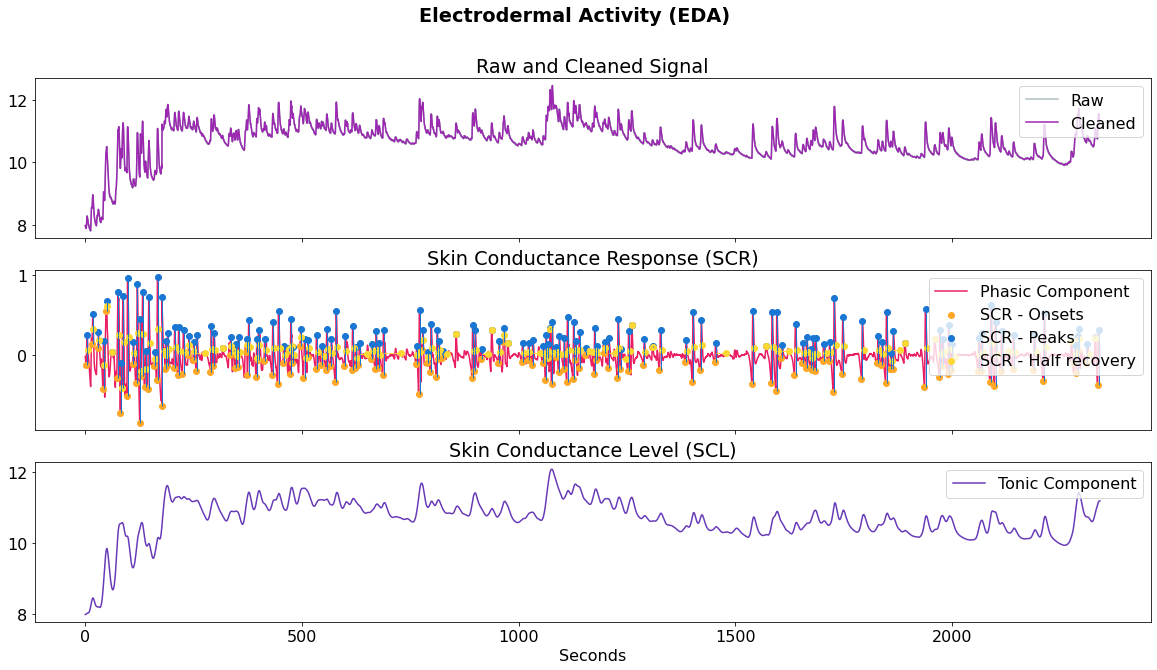

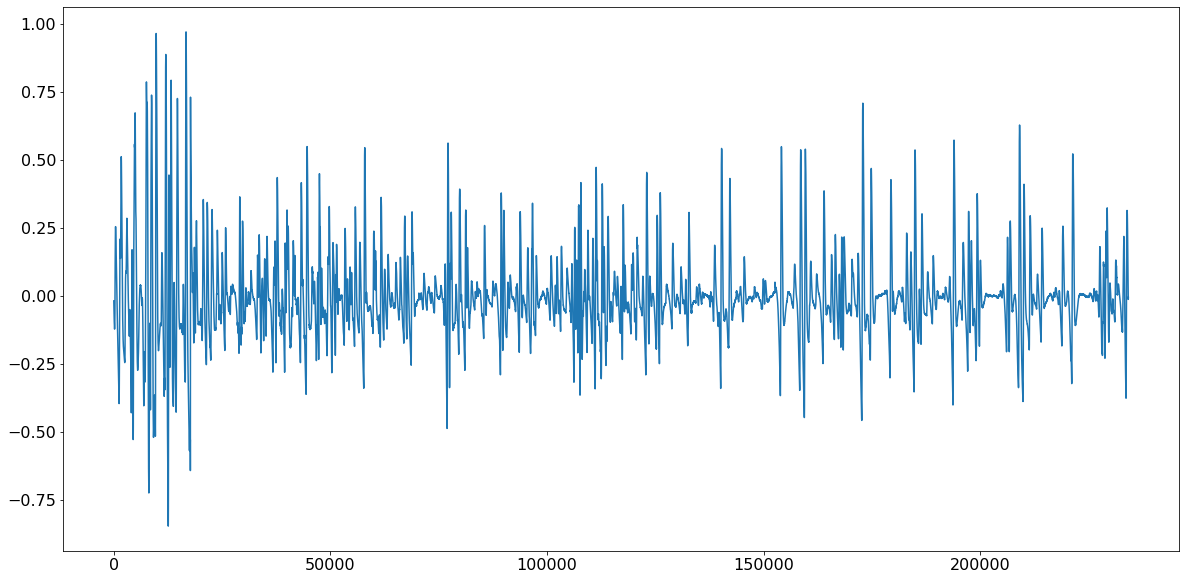

In [53]:
signals, info = nk.eda_process(pat1_eda_new, sampling_rate=100)
nk.eda_plot(signals, sampling_rate=100)
pat1_eda_phasic = signals['EDA_Phasic']
plt.show()
plt.plot(pat1_eda_phasic)
plt.show()

    if i cut eda signal i have to cut also pupil signal

In [124]:
signals['SCR_Peaks']

0         0
1         0
2         0
3         0
4         0
         ..
234125    0
234126    0
234127    0
234128    0
234129    0
Name: SCR_Peaks, Length: 234130, dtype: int64

In [129]:
signals[signals['SCR_Peaks']==1]['EDA_Phasic']

406       0.255622
1719      0.513169
3017      0.286372
4208      0.170545
4919      0.674347
            ...   
228989    0.239548
229249    0.324641
231241    0.132725
233098    0.219587
233834    0.315162
Name: EDA_Phasic, Length: 152, dtype: float64

TODO in realtà forse non è detto

In [21]:
if len(pat1_pupil)>cut_index:
    pat1_pupil = pat1_pupil[:cut_index]
    print("pupil cutted")

In [22]:
len(pat1_pupil)

112000

In [23]:
# total length in seconds of the signal
len_sec = len(pat1_eda_new)*0.01
len_sec

2341.3

In [24]:
NUM_TRIALS=160

In [25]:
len_sec/NUM_TRIALS

14.633125000000001

14.6 seconds every trial i think it's too much but i cut for example only first 100 seconds

latency of eda signal 5000 msec so i decided to shift to 5 sec the first 50 sec

In [87]:
LATENCY_EDA_SECS=5
LATENCY_PUPIL_SECS=1
LEN_SECS = 100

In [88]:
pat1_eda_lat = pat1_eda_new[(LATENCY_EDA_SECS*100):]
pat1_eda_cut = pat1_eda_lat[:(100*LATENCY_EDA_SECS)+(100*LEN_SECS)]

latency of pupil 1000 msec so i decided to shift 1 sec the first 50 secs

In [97]:
x_pupil_lat = X[(LATENCY_PUPIL_SECS*100):]
x_pupil_cut = x_pupil_lat[:(LEN_SECS*100)+(LATENCY_PUPIL_SECS*100)]

In [98]:
# trasform pupil data from secs to mseconds
x_pupil_cut = [x*100 for x in x_pupil_cut]

y_pupil_lat = Y[LATENCY_PUPIL_SECS*100:]

shift y to compare signal with eda

In [99]:
Y_SHIFT_ADD=-2
Y_SHIFT_MULT=5

In [100]:
y_pupil_lat_shifted = [(y+Y_SHIFT_ADD)*Y_SHIFT_MULT for y in y_pupil_lat]

In [101]:
y_pupil_cut = y_pupil_lat_shifted[:(LEN_SECS*100)+(LATENCY_PUPIL_SECS*100)]

### plot near first 100 secs eda and first 100 secs pupil

In [116]:
signals_cut, info_cut = nk.eda_process(pat1_eda_cut, sampling_rate=100)
pat1_eda_phasic_cut = signals_cut['EDA_Phasic']

10500


In [103]:
x_peaks = [i for i, value in enumerate(signals_cut['SCR_Peaks']) if value == 1]
print(x_peaks)
x_onsets = [i for i, value in enumerate(signals_cut['SCR_Onsets']) if value == 1]
print(x_onsets)
x_recovery = [i for i, value in enumerate(signals_cut['SCR_Recovery']) if value == 1]
print(x_recovery)

[1219, 2517, 3708, 4419, 5681, 7032, 7796, 8215, 8911, 9268]
[1036, 2334, 3543, 4303, 5646, 6745, 7590, 7954, 8786, 9094]
[1338, 2650, 3835, 4463, 5692, 7356, 7946, 8420, 9004, 9532]


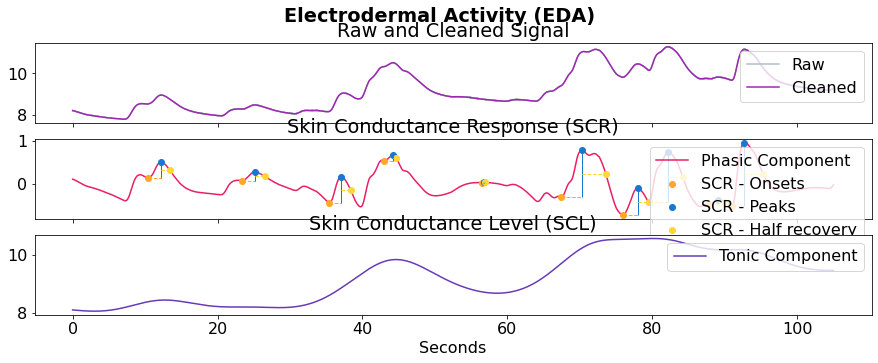

In [104]:
#plot total graph eda
nk.eda_plot(signals_cut, sampling_rate=100)
plt.show()

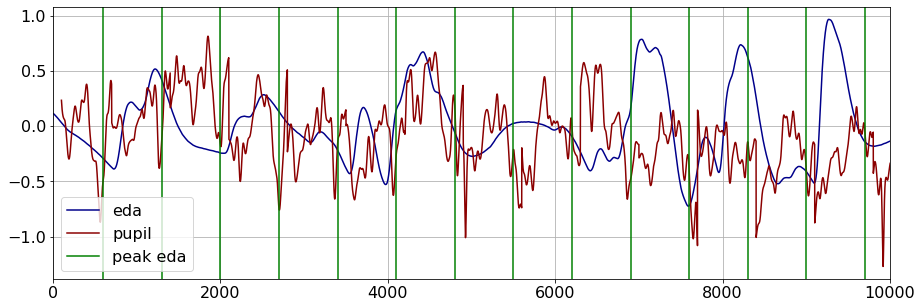

In [131]:
#eda plot
plt.plot(pat1_eda_phasic_cut,color='darkblue')

# pupil plot
plt.plot(x_pupil_cut, y_pupil_cut, color='darkred')

'''
#code to plot onsets points on eda
for x in x_onsets:
   plt.axvline(x/100,color='orange')

#code to plot recovery points on eda
for x in x_recovery:
   plt.axvline(x/100,color='red')
'''
#code to plot trial division
for x in range(600,10000,700):
    plt.axvline(x, color='green')
'''
for peak in x_peaks:
   plt.axvline(peak,color='orange')
'''
plt.grid()
plt.xlim(0,LEN_SECS*100)
plt.legend(['eda','pupil','peak eda'])
plt.show()

In [111]:
print(len(x_pupil_lat))
print(len(pat1_eda_lat))
print(len(y_pupil_lat_shifted))
min_ = min(len(pat1_eda_lat), len(y_pupil_lat_shifted))
min_

111900
233630
111900


111900

In [118]:
d = {'eda_phasic':pat1_eda_lat[:min_],'pupil_dilatation':y_pupil_lat_shifted[:min_],'subject':[1 for x in range(0,min_)]}
df_sync_pat1 = pd.DataFrame(d)
df_sync_pat1

,eda_phasic,pupil_dilatation,subject
0,8.21991,0.235489,1
1,8.22449,0.223454,1
2,8.22144,0.211706,1
3,8.22449,0.200331,1
4,8.21991,0.189401,1
...,...,...,...
111895,11.19080,0.171964,1
111896,11.19540,0.174050,1
111897,11.19230,0.176025,1
111898,11.19540,0.177877,1


### try to calculate correlation coefficient

In [84]:
min_ = min(len(pat1_eda_phasic_cut), len(y_pupil_cut))
min_

10000

In [85]:
range_ = abs(len(pat1_eda_phasic_cut) - len(y_pupil_cut))
range_

0

In [86]:
max_rho = float(-1)
min_rho = float(1)
index_max = 0
index_min = 0
for i in range(range_):
    x_simple = np.array(y_pupil_cut)[:min_]
    y_simple = np.array(pat1_eda_phasic_cut)[i:min_+i]
    my_rho = float(np.corrcoef(x_simple, y_simple)[0][1])

    if my_rho > max_rho:
        max_rho = my_rho
        index_max = i

    if my_rho < min_rho:
        min_rho = my_rho
        index_min = i
print("max ", max_rho, index_max)
print("min ", min_rho, index_min)

max  -1.0 0
min  1.0 0


# work on heart data

In [ ]:
result = pyreadr.read_r('osfstorage-archive/RDS/heart.rds')
df = result[None]
df

In [ ]:
result = pyreadr.read_r('osfstorage-archive/RDS/heart.wide.rds')
df = result[None]
df

# Test on notebook

In [1]:
import csv
import matplotlib
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from scipy import stats

# setup plots
#matplotlib.use("TkAgg")
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size'] = 16

# remove patients non valid for eda
notvalid = [x for x in range(34, 41)]
notvalid.append(9)
valid_patients_eda = [ele for ele in range(1, 56) if ele not in notvalid]

# remove patients non-valid for pupil
notvalid = [x for x in range(34, 41)]
notvalid.extend([9, 11, 20, 25, 42])
valid_patients_pupil = [ele for ele in range(1, 56) if ele not in notvalid]

NUM_TRIALS = 160

# select patients with either pupil and eda data
valid_pupil_eda = list(set(valid_patients_eda).intersection(set(valid_patients_pupil)))


def read_csv_pupil_raw(subject_number:int) -> pd.DataFrame:
    '''
    Read pupil csv files
    :param subject_number:
    :return: A dataframe with pupil data of the subject subject_number
    '''
    if subject_number not in valid_patients_pupil:
        print('subject number not valid, probably this patient has not valid pupil signals')
        return pd.DataFrame()
    if subject_number < 10:
        subject_number = '0' + str(subject_number)
    pupil1 = pd.read_csv('../osfstorage-archive/eye/pupil/Look0' + str(subject_number) + '_pupil.csv', sep=';')
    for i in pupil1.columns:
        if i != 'trial':
            for j in pupil1.index:
                pupil1.loc[j, i] = pupil1.loc[j, i].replace(',', '.')
    cols = pupil1.columns.drop('trial')

    pupil1[cols] = pupil1[cols].apply(pd.to_numeric, errors='coerce')
    return pupil1


def create_csv_pupil():
    '''
    Create in current folder one tmp csv well formatted with pupil data for each subject
    :return: nothing
    '''
    for subject in valid_patients_pupil:
        pupil_i = read_csv_pupil_raw(subject)
        name = 'tmp_pupil' + str(subject) + '.csv'
        pupil_i.to_csv(name, index=False)

def read_csv_pupil(subject:int) -> pd.DataFrame:
    '''
    Read in current folder one tmp csv well formatted with pupil data
    :param subject:
    :return: Dataframe with pupil data of the subject
    '''
    name = 'tmp_pupil'+str(subject)+'.csv'
    return pd.read_csv(name, sep=',')

def extract_pupil_by_subject(subject_number:int) -> list:
    '''
    Extract pupil data of the subject and return same data in one list adding NaN values to reach same trial length of eda data
    :param subject_number:
    :return:
    '''
    pupil = read_csv_pupil(subject_number)
    pupil_ = pupil.copy().drop(['trial'], axis=1)
    # convert all datas into one list
    pat1_pupil = []
    len_eda = int(len_trial_eda(subject_number))
    for i in range(160):
        raw_list = pupil_.loc[i, :].values.flatten().tolist()
        pat1_pupil = pat1_pupil + raw_list
        for j in range(len_eda-700):
            pat1_pupil.append('NaN')
    # pat1_pupil

    return pat1_pupil


def len_trial_eda(subject:int) -> int:
    '''
    Calculate the length of the trial of the eda signal given subject number
    :param subject:
    :return: int that indicates the length
    '''
    df_subject = modified_eda_by_subject(subject)
    return len(df_subject)/NUM_TRIALS

def extract_eda_by_subject(subject_number: int) -> list:
    '''
    Extract eda data of the subject (reading tmp_eda csv files in current folder) and return same data in one list
    :param subject_number:
    :return:
    '''
    if subject_number not in valid_patients_eda:
        print('subject number not valid, probably this patient has not valid eda signals')
        return []
    if subject_number < 10:
        subject_number = '0' + str(subject_number)
    path_csv = str("tmp_eda" + str(subject_number) + ".csv")
    pat_eda = pd.read_csv(path_csv)['CH1']
    return pat_eda.to_numpy()


def extract_maxpupil_trial(subject: int) -> list:
    '''
    Calculate the max value of pupil signal in each trial.
    :param subject:
    :return: a list with same length of the pupil signal filled with 0 or 1. 1 if the equivalent value is a max, 0 otherwise
    '''
    pupil_csv = read_csv_pupil(subject)
    max_list = []
    max_length = max(700, int(len_trial_eda(subject)))
    for i in range(160):
        max_trial_list = list(pupil_csv.loc[i])[1:]
        max_ = max(max_trial_list)
        max_index = max_trial_list.index(max_)
        for j in range(max_length):
            if j == max_index:
                max_list.append(1)
            else:
                max_list.append(0)
    return max_list


def all_subject_pupil() -> pd.DataFrame:
    '''
    Create a dataframe with all pupil data of all subject after adding latency
    :return: a dataframe with all pupil data of all subject with columns ['pupil_diameter', 'pupil_peak', 'subject']
    '''
    generic_df = pd.DataFrame(columns=['pupil_diameter', 'pupil_peak', 'subject'])
    for i in tqdm(valid_pupil_eda):
        subject = i
        #print(f'pupil: {subject}')
        person_i_all_pupil = extract_pupil_by_subject(subject)
        max_list_i = extract_maxpupil_trial(subject)
        #print(f'person: {len(person_i_all_pupil)}, max: {len(max_list_i)}')
        dict_ = {'pupil_diameter': person_i_all_pupil, 'pupil_peak': max_list_i,
                 'subject': [i for x in range(len(max_list_i))]}
        df_ = pd.DataFrame(dict_)
        df_ = add_latency(df_, -1)
        #df_['time'] = np.arange(0, len(df_) / 100, 0.01)
        generic_df = pd.concat([generic_df, df_], axis=0)

    return generic_df


def resample_eda(eda_signal:list) -> list:
    '''
    Change sampling rate of the eda signal from 500hz to 100hz
    :param eda_signal: list of eda_signal with sampling rate of 500hz
    :return: list of eda_signal with sampling rate of 100hz
    '''
    eda_new = []
    for x in range(len(eda_signal)):
        if x % 5 == 0:
            eda_new.append(eda_signal[x])
    return eda_new


def add_latency(dataframe, msecs):
    new_df = dataframe
    time_ = []
    first_value = msecs
    for i in range(len(dataframe)):
        time_.append(first_value)
        first_value += 0.01
    #print(len(time_))
    new_df['time'] = time_
    return new_df


def all_subject_eda() -> pd.DataFrame:
    generic_df = pd.DataFrame(columns=['subject', 'phasic', 'phasic_peak'])
    for i in tqdm(valid_pupil_eda):
        df_ = modified_eda_by_subject(i)
        #df_['time'] = np.arange(0, len(signals) / 100, 0.01)[:len(df_)] #no sense sta cosa ma senza non va
        generic_df = pd.concat([generic_df, df_], axis=0)
    return generic_df


def modified_eda_by_subject(subject):
    eda = extract_eda_by_subject(subject)
    # print(f'eda: {i}')
    eda = resample_eda(eda)
    signals, info = nk.eda_process(eda, sampling_rate=100, method="neurokit")
    eda_phasic = signals['EDA_Phasic']
    eda_phasic = remove_last_zeros(eda_phasic)
    eda_phasic = remove_outliers(eda_phasic)
    df = {'subject': subject, 'phasic': eda_phasic, 'phasic_peak': signals['SCR_Peaks'][:len(eda_phasic)]}
    df_ = pd.DataFrame(df)
    df_ = add_latency(df_, -5)
    return df_

def plot_(df):
    df.replace('NaN', 0)
    plt.plot(list(df.time), list(df.pupilDiameter))
    plt.plot(list(df.time), list(df.phasic))
    #plt.show()

def remove_outliers(l) -> list:
    z = np.abs(stats.zscore(l))
    THRESHOLD = 4
    PERC_LEN = 0.80
    # Position of the first outlier
    outliers = np.where(z>THRESHOLD)[0]
    for x in outliers:
        if x > PERC_LEN*len(l):
            l = l[:x]
            break
    '''
    for x in outliers:
        if x < (1-PERC_LEN)*len(l):
            l = l[x:]
            break
    '''
    return l

def remove_last_zeros(l)->list:
    l=list(l)
    if len(l)>0:
        while abs(l[-1]) < 0.01:
            l.pop()
    return l
def correct_pupil_diam(l)->list:
    ADD_SHIFT = -2
    MULT_SHIFT = 4
    return [(x+ADD_SHIFT)*MULT_SHIFT if x != 'NaN' else float('NaN') for x in l]

In [2]:
print("extract eda for each patient")
df_sync_eda = all_subject_eda()

print("extract pupil for each patient")
df_sync_pupil = all_subject_pupil()
print(len(df_sync_pupil), len(df_sync_eda))

extract eda for each patient


100%|██████████| 43/43 [00:39<00:00,  1.09it/s]


extract pupil for each patient


100%|██████████| 43/43 [01:18<00:00,  1.82s/it]

6630880 6344655


In [3]:
df_sync_pupil.time

0           -1.00
1           -0.99
2           -0.98
3           -0.97
4           -0.96
           ...   
174395    1742.95
174396    1742.96
174397    1742.97
174398    1742.98
174399    1742.99
Name: time, Length: 6630880, dtype: float64

In [4]:
print("merge pupil and eda")

# cast to int in order to merge the two dataframes
df_sync_pupil.time = np.round(df_sync_pupil.time*100).astype(int)
df_sync_eda.time = np.round(df_sync_eda.time*100).astype(int)
df_merge = df_sync_pupil.merge(df_sync_eda, how='right', on = ['subject', 'time'])
df_merge.time = df_merge.time/100
df_merge

merge pupil and eda


/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_20285/4078426580.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_merge = df_sync_pupil.merge(df_sync_eda, how='right', on = ['subject', 'time'])


,pupil_diameter,pupil_peak,subject,time,phasic,phasic_peak
0,NaN,NaN,1,-5.00,-0.017535,0
1,NaN,NaN,1,-4.99,-0.018487,0
2,NaN,NaN,1,-4.98,-0.019440,0
3,NaN,NaN,1,-4.97,-0.020392,0
4,NaN,NaN,1,-4.96,-0.021337,0
...,...,...,...,...,...,...
6344650,NaN,0,55.0,1739.55,-0.012728,0
6344651,NaN,0,55.0,1739.56,-0.012025,0
6344652,NaN,0,55.0,1739.57,-0.011332,0
6344653,NaN,0,55.0,1739.58,-0.010655,0


In [5]:
print("correct pupil diameter")
df_merge['pupil_diameter'] = correct_pupil_diam(list(df_merge.pupil_diameter))

correct pupil diameter


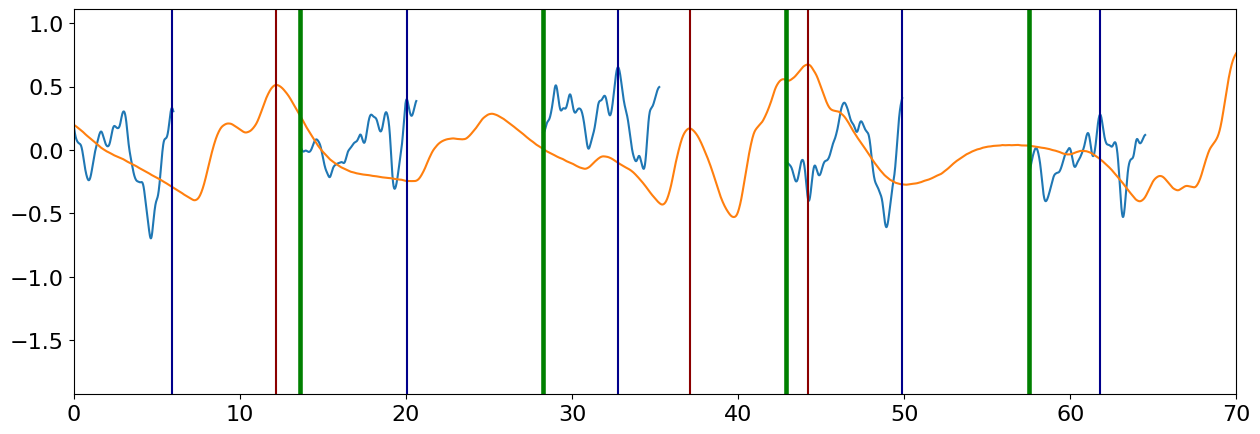

In [6]:
# plot subject 1
df_pat_1 = df_merge[df_merge.subject==1]
eda_peaks = df_pat_1[df_pat_1['phasic_peak']==1]['time']
pupil_peaks = df_pat_1[df_pat_1['pupil_peak']==1]['time']
#df_pat_1 = df_pat_1.replace('NaN', 0)
plt.plot(list(df_pat_1.time), list(df_pat_1.pupil_diameter))
plt.plot(list(df_pat_1.time), list(df_pat_1.phasic))
for peak in eda_peaks:
   plt.axvline(peak,color='darkred')
for peak in pupil_peaks:
   plt.axvline(peak,color='darkblue')

trial = np.arange(-1, 6000, len_trial_eda(1)/100)
for tri in trial:
    plt.axvline(tri, color='green', linewidth=3.3)
plt.xlim(0, 10*7)
plt.show()

